In [1]:
from IPython.display import Image

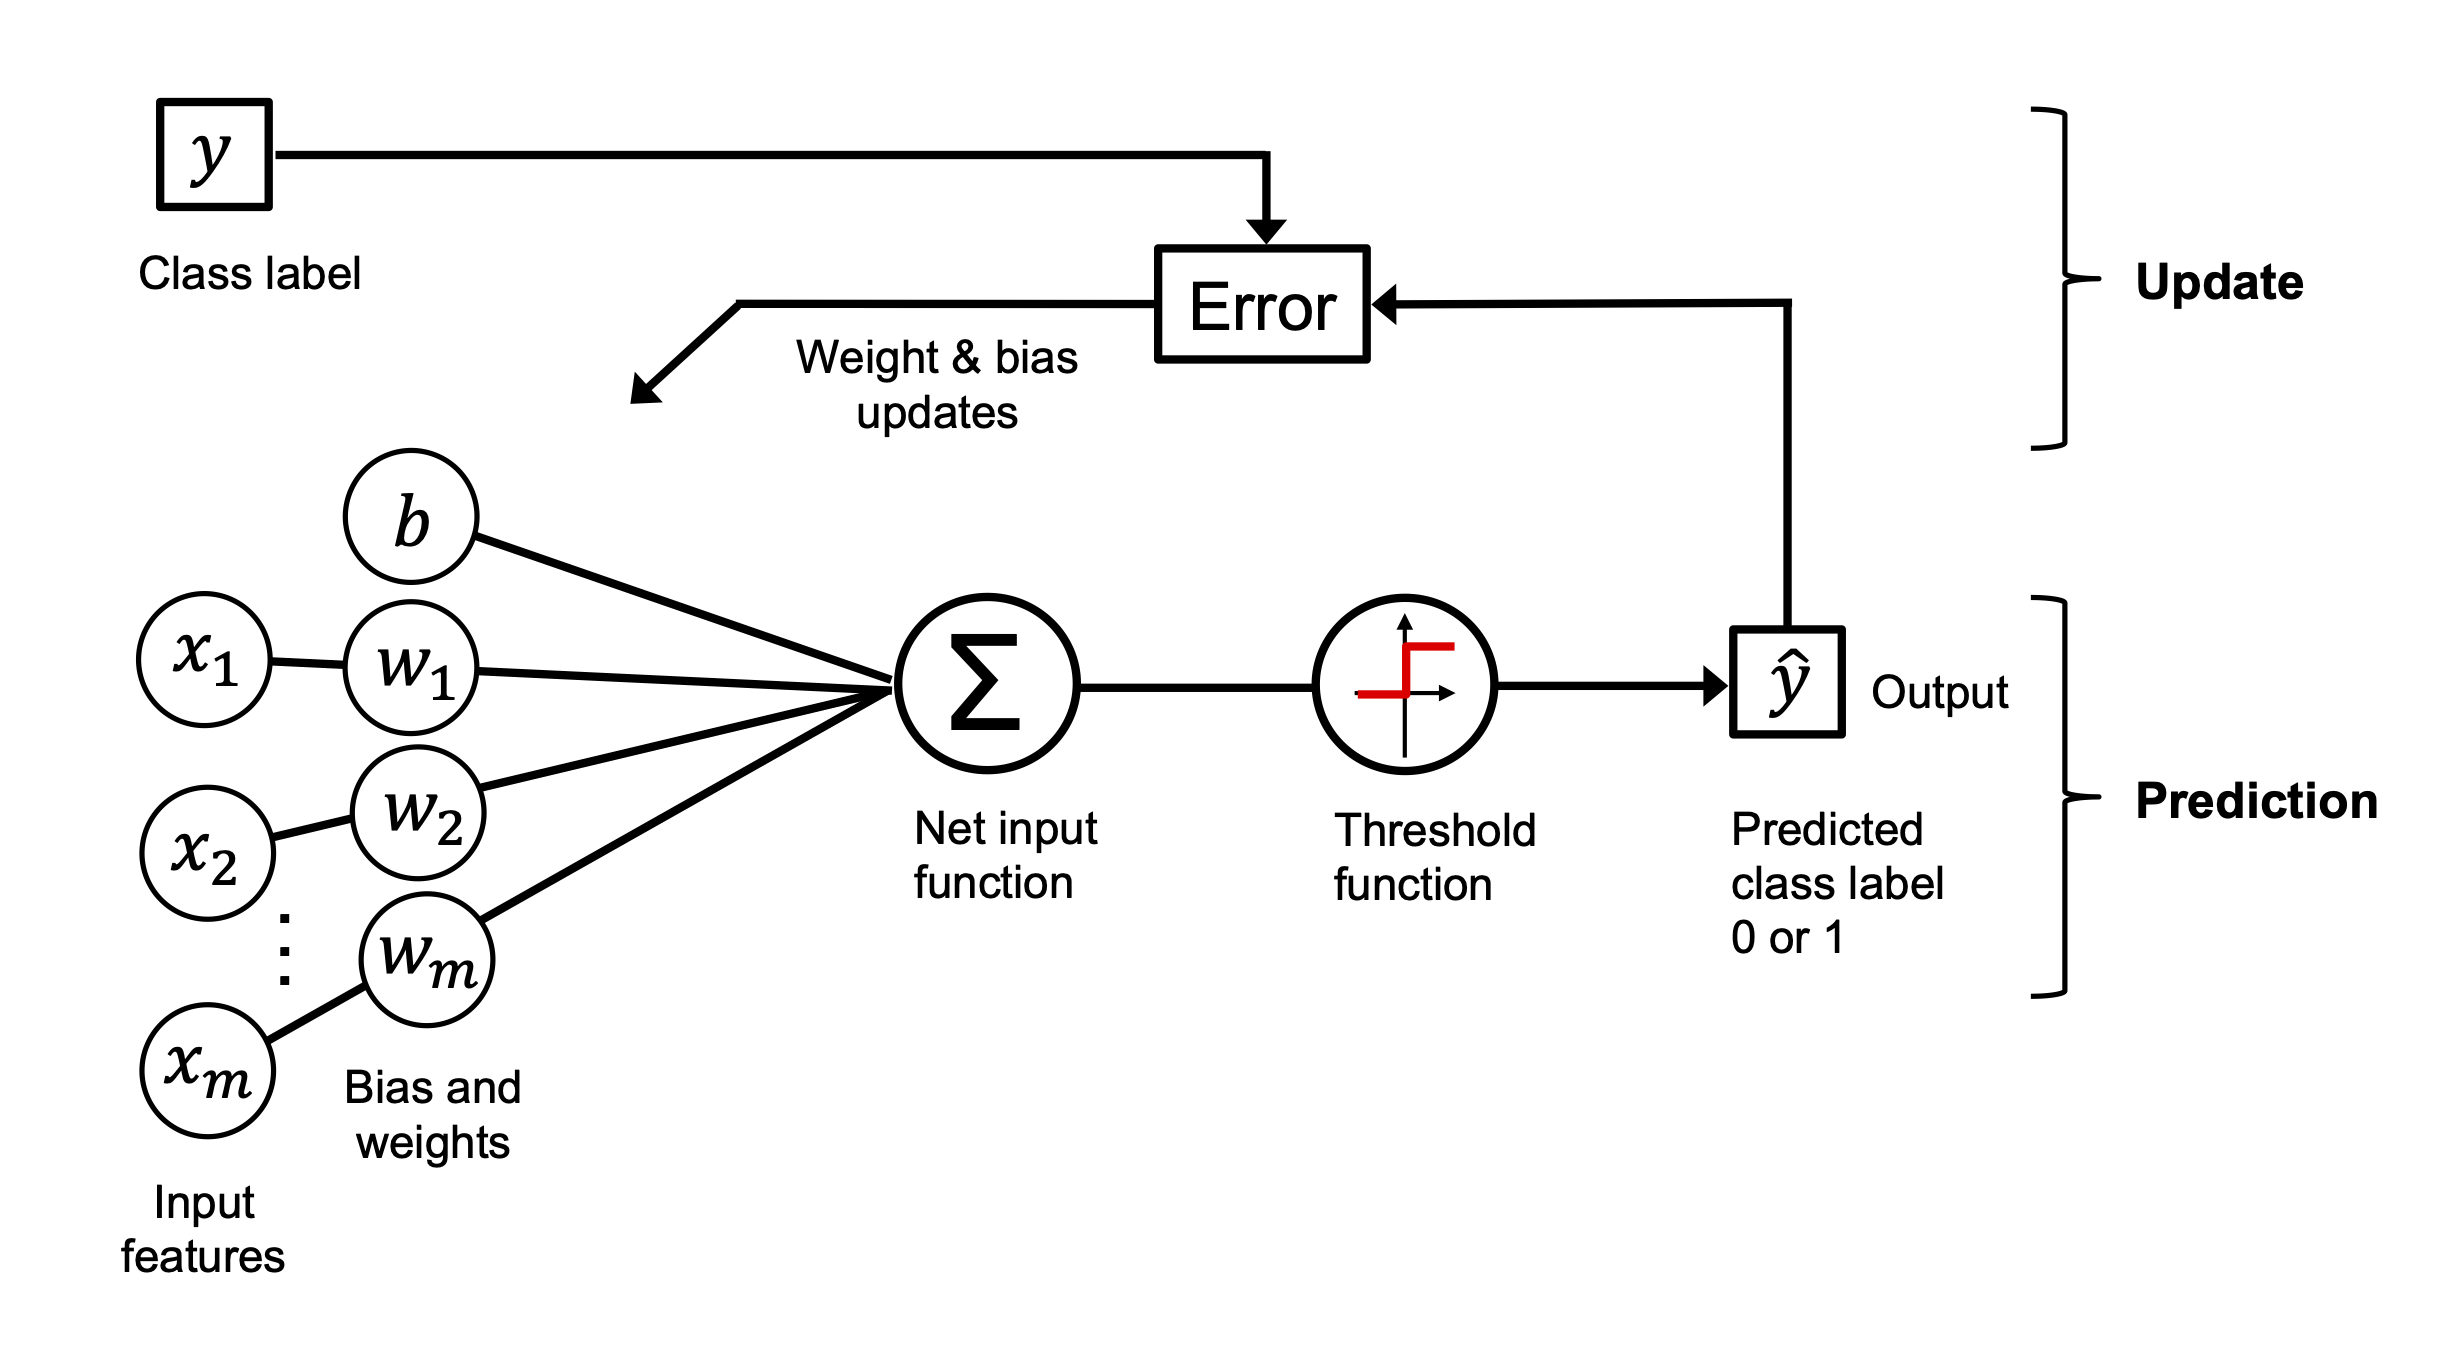

In [4]:
Image(filename='./images/ppn_algo.png')

# Implementing a perceptron learning algorithm using OOP Python API

In [1]:
import numpy as np


class Perceptron:
  """
  Parameters:
    - eta: float
      Learing rate (between 0.0 and 1.0).
    - n_iter: int
      Number of interations over the training dataset.
    - random_state: int
      Random number generator seed for random weight init.
  """
  def __init__(self, eta: float = 0.01, n_iter: int = 50, random_state: int = 1) -> None:
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """
    Parameters:
      - X: {array-like}, shape = [n_examples, n_features]
        Training vectors.
      - y: {array-like}, shape = [n_examples]
        Traget values.
    """
    rgen = np.random.RandomState(self.random_state)
    
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float_(0.)
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    
    return self

  def net_input(self, X):
    """
    Calculate net input
    """
    return np.dot(X, self.w_) + self.b_

  def predict(self, X):
    """
    Return class label after unit step
    """
    return np.where(self.net_input(X) >= 0.0, 1, 0)


# Training implemented perceptron model on the Iris dataset

## Reding the Iris dataset

In [2]:
import os
import pandas as pd

dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(dataset_url, header=None, encoding="utf-8")

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Plotting the Iris data

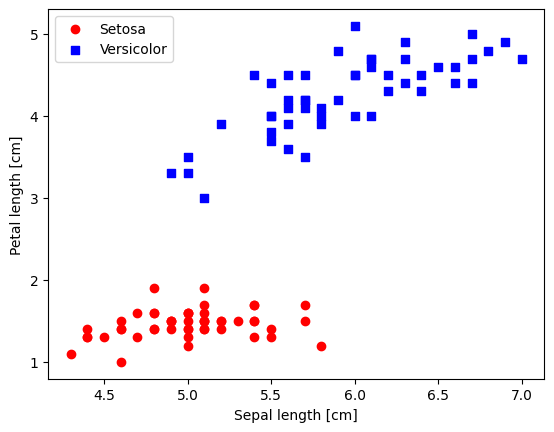

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

# Training the perceptron model

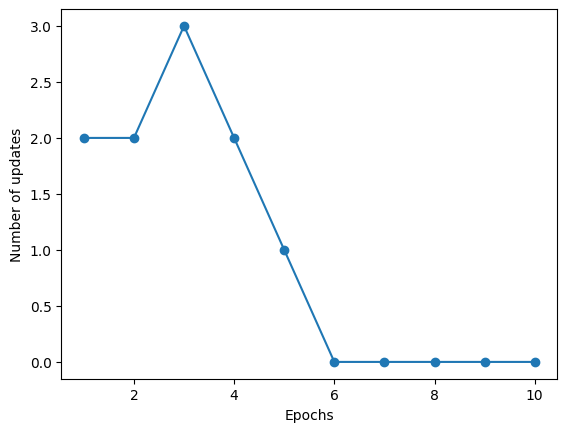

In [4]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()